Установка Spark

In [1]:
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:14 http://ppa.lau

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://downloads.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

In [4]:
!tar -xvf spark-3.2.1-bin-hadoop2.7.tgz

spark-3.2.1-bin-hadoop2.7/
spark-3.2.1-bin-hadoop2.7/LICENSE
spark-3.2.1-bin-hadoop2.7/NOTICE
spark-3.2.1-bin-hadoop2.7/R/
spark-3.2.1-bin-hadoop2.7/R/lib/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/
spark-3.2.1-bin-hadoop2.7/R/lib/SparkR/help/An

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [8]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

## Работа с RDD

In [9]:
words = sc.parallelize (
   ["scala", 
   "java", 
   "hadoop", 
   "spark", 
   "akka",
   "spark",
   "hadoop", 
   "pyspark",
   "bigdata",
    "python"]
)

In [10]:
words.count()

10

In [11]:
def mapper(w):
  return (w, 1)

In [12]:
words.map(mapper)

PythonRDD[2] at RDD at PythonRDD.scala:53

In [13]:
transform = words.map(mapper)

In [14]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 1),
 ('spark', 1),
 ('akka', 1),
 ('spark', 1),
 ('hadoop', 1),
 ('pyspark', 1),
 ('bigdata', 1),
 ('python', 1)]

In [15]:
def reducer(a,b):
  return a + b

In [16]:
transform.reduceByKey(reducer).collect()# in one row for comparison

[('scala', 1),
 ('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('bigdata', 1),
 ('python', 1),
 ('spark', 2),
 ('pyspark', 1)]

In [17]:
transform = transform.reduceByKey(reducer)

In [18]:
transform.collect()

[('scala', 1),
 ('java', 1),
 ('hadoop', 2),
 ('akka', 1),
 ('bigdata', 1),
 ('python', 1),
 ('spark', 2),
 ('pyspark', 1)]

## DataFrame

In [20]:
df = spark.read.csv('power.csv', inferSchema=True, header=True)


Обзор

In [21]:
df.count()

91674

In [22]:
df.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [23]:
df.head(3)# for comparison

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1),
 Row(country='Belgium', year=2014, quantity=0.0, category=1)]

In [24]:
df.take(3)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1),
 Row(country='Belgium', year=2014, quantity=0.0, category=1)]

## Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [74]:
df_pr = spark.read.csv("/content/transactions.csv", inferSchema=True, header=True)

In [75]:
df_pr.take(3)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200)]

Выборки

In [27]:
df_lim = df.select('country', 'year', 'quantity')
df_lim.take(2)

[Row(country='Austria', year=1996, quantity=5.0),
 Row(country='Austria', year=1995, quantity=17.0)]

In [28]:
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [29]:
df_lim.columns

['country', 'y', 'quantity']

Описание и статистики

In [30]:
df_lim.show()

+-------+----+--------+
|country|   y|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [31]:
df_lim.describe().show()

+-------+-----------+-----------------+-----------------+
|summary|    country|                y|         quantity|
+-------+-----------+-----------------+-----------------+
|  count|      91674|            91674|            91674|
|   mean|       null|2003.455047232585| 6709.25873315012|
| stddev|       null|7.214905456844704|46184.47800355738|
|    min|Afghanistan|             1990|          -1937.0|
|    max|   Zimbabwe|             2014|        2148690.3|
+-------+-----------+-----------------+-----------------+



Сохранение

In [32]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

Вычисления

In [35]:
df_lim = df_lim.withColumn('quantity x2', df_lim['quantity'] * 2)
df_lim.head(2)

[Row(country='Austria', y=1996, quantity=5.0, quantity x2=10.0),
 Row(country='Austria', y=1995, quantity=17.0, quantity x2=34.0)]

In [41]:
df_grp = df_lim.groupBy('country')
df_grp

Свободные таблицы

In [42]:
df_sum = df_grp.sum('quantity', 'quantity x2')
df_sum.show()

+------------------+------------------+------------------+
|           country|     sum(quantity)|  sum(quantity x2)|
+------------------+------------------+------------------+
|     Côte d'Ivoire|      12062.304782|      24124.609564|
|              Chad|16067.143999999998|32134.287999999997|
|          Paraguay|64431.939999999995|128863.87999999999|
|          Anguilla|             520.0|            1040.0|
|             Yemen|            8367.0|           16734.0|
|State of Palestine|             521.2|            1042.4|
|           Senegal| 37683.43337646103| 75366.86675292205|
|            Sweden|       2.4582429E7|       4.9164858E7|
|        Cabo Verde| 44.84899999999999| 89.69799999999998|
|          Kiribati|57.980000000000004|115.96000000000001|
|            Guyana| 135681.6253494831| 271363.2506989662|
|       Philippines| 488657.5163919993| 977315.0327839986|
|           Eritrea|          405776.0|          811552.0|
|            Jersey|211.46726862302495| 422.934537246049

In [43]:
df_lim.groupby('country').pivot('y').sum('quantity').show()

+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+
|           country|              1990|              1991|              1992|              1993|              1994|             1995|             1996|             1997|              1998|              1999|              2000|               2001|              2002|              2003|              2004|              2005|              2006|              2007|             2008|              2009|              2010|              2011|              2012|              2013|                2014|
+---------

## Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [76]:
df_pr.head(3)

[Row(Year=2017, Month=1, ID='t001', Product='A1', Amount=7, Price=2904, Total=20328, Cost=1200),
 Row(Year=2017, Month=1, ID='t002', Product='A2', Amount=2, Price=1896, Total=3792, Cost=1100),
 Row(Year=2017, Month=2, ID='t003', Product='A1', Amount=5, Price=2904, Total=14520, Cost=1200)]

In [49]:
df_pr.show()

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
|2017|    4|t011|     _2|     4| 1896| 7584| 800|
|2017|    4|t012|     _5|     5| 5175|25875| 700|
|2017|    4|t013|     _8|     3| 3760|11280|1200|
|2017|    4|t014|     _4|     1| 8618| 8618| 250|
|2017|    5|t015|     _2|     2| 1896| 3792| 650|
|2017|    5|t016|     A4|     3| 8618|25854|2400|
|2017|    5|t017|     A5|     2| 5175|10350|1200|


In [44]:
df_pr.columns

['Year', 'Month', 'ID', 'Product', 'Amount', 'Price', 'Total', 'Cost']

In [50]:
df_pr_max = df_pr.groupby('Product').max('Amount')
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [47]:
df_pr_max = df_pr.groupby('Product').pivot('Month').max('Amount')
df_pr_max.show()

+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|Product|   1|   2|   3|   4|   5|   6|   7|   8|   9|  10|  11|  12|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|     _5|null|null|   2|   5|   6|   2|null|   1|   5|   6|   5|   2|
|     _2|null|null|null|   4|   2|   1|   6|null|   8|null|   5|   8|
|     A2|   2|null|null|null|null|null|null|null|null|null|   2|null|
|     _8|null|null|null|   3|null|  10|null|null|   1|   3|null|   3|
|     _3|null|null|   6|null|   7|null|null|   2|   3|   3|null|   4|
|     _4|null|null|null|   2|null|   3|   2|null|   2|   2|null|   2|
|     _6|null|   4|null|null|   4|null|null|null|null|null|null|null|
|     A4|null|   1|null|null|   3|null|   2|null|null|null|   3|null|
|     A5|null|   3|null|null|   2|null|null|   2|null|null|   7|null|
|     A1|   7|   5|null|null|null|null|null|null|null|null|   5|   9|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+



In [51]:
df_pr_min = df_pr.groupby('Product').min('Amount')
df_pr_min.show()

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



In [48]:
df_pr_min = df_pr.groupby('Month').pivot('Product').min('Amount')
df_pr_min.show()

+-----+----+----+----+----+----+----+----+----+----+----+
|Month|  A1|  A2|  A4|  A5|  _2|  _3|  _4|  _5|  _6|  _8|
+-----+----+----+----+----+----+----+----+----+----+----+
|   12|   9|null|null|null|   8|   4|   2|   2|null|   2|
|    1|   7|   2|null|null|null|null|null|null|null|null|
|    6|null|null|null|null|   1|null|   3|   2|null|   3|
|    3|null|null|null|null|null|   6|null|   2|null|null|
|    5|null|null|   3|   2|   2|   5|null|   4|   4|null|
|    9|null|null|null|null|   8|   3|   2|   1|null|   1|
|    4|null|null|null|null|   4|null|   1|   5|null|   3|
|    8|null|null|null|   2|null|   2|null|   1|null|null|
|    7|null|null|   1|null|   4|null|   2|null|null|null|
|   10|null|null|null|null|null|   3|   2|   6|null|   3|
|   11|   2|   2|   3|   6|   5|null|null|   5|null|null|
|    2|   5|null|   1|   3|null|null|null|null|   4|null|
+-----+----+----+----+----+----+----+----+----+----+----+



Подвыборки

In [53]:
x = df['quantity'] > 184264

In [54]:
df.where(x).show()

+-------------+----+--------+--------+
|      country|year|quantity|category|
+-------------+----+--------+--------+
|United States|2014|367987.0|       2|
|United States|2013|384439.0|       2|
|United States|2012|370625.0|       2|
|United States|2011|310909.0|       2|
|United States|2010|335418.0|       2|
|United States|2009|230589.0|       2|
|United States|2008|226570.0|       2|
|United States|2007|221771.0|       2|
|United States|2005|314655.0|       2|
|United States|2004|243916.0|       2|
|United States|1996|226319.0|       2|
|United States|1995|292568.0|       2|
|United States|1994|230254.0|       2|
|United States|1993|247909.0|       2|
|United States|2014|448216.0|       2|
|United States|2013|458711.0|       2|
|United States|2012|433505.0|       2|
|United States|2011|382566.0|       2|
|United States|2010|406606.0|       2|
|United States|2009|296903.0|       2|
+-------------+----+--------+--------+
only showing top 20 rows



In [57]:
df_filter = df.where((df['quantity'] > 184264) & (df['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



In [58]:
df_filter1 = df.where(x | (df['country'] != 'United States'))
df_filter1.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



# Практика 3. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук


In [59]:
df_pr.columns

['Year', 'Month', 'ID', 'Product', 'Amount', 'Price', 'Total', 'Cost']

In [61]:
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [60]:
df_pr.where(df_1['Amount'] > 5).show()

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    5|t020|     _5|     6| 5175|31050| 800|
|2017|    5|t021|     _3|     7| 1265| 8855| 700|
|2017|    6|t023|     _8|    10| 3760|37600| 200|
|2017|    7|t031|     _2|     6| 1896|11376| 650|
|2017|    9|t040|     _2|     8| 1896|15168|1000|
|2017|   10|t044|     _5|     6| 5175|31050| 700|
|2017|   11|t047|     A5|     6| 5175|31050|2400|
|2017|   11|t052|     A5|     7| 5175|36225| 700|
|2017|   12|t054|     A1|     9| 2904|26136| 650|
|2017|   12|t057|     _2|     8| 1896|15168|1200|
+----+-----+----+-------+------+-----+-----+----+



In [63]:
df_pr_max.columns

['Product', 'max(Amount)']

In [64]:
df_pr_max.where(df_pr_max['max(Amount)'] > 5).show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



## SQL

In [66]:
df.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [67]:
df.createOrReplaceTempView('power')# namization in spark

In [68]:
spark.sql('SELECT * FROM power').show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
|Belgium|2011|    25.0|       1|
|Belgium|2010|    22.0|       1|
|Belgium|2009|    45.0|       1|
|Czechia|1998|     1.0|       1|
|Czechia|1995|     7.0|       1|
|Finland|2010|     9.0|       1|
|Finland|2009|    13.0|       1|
|Finland|2008|    39.0|       1|
|Finland|2007|    21.0|       1|
|Finland|2006|     0.0|       1|
|Finland|2005|     0.0|       1|
|Finland|2004|     0.0|       1|
|Finland|2003|     0.0|       1|
|Finland|2002|     0.0|       1|
|Finland|2001|     0.0|       1|
+-------+----+--------+--------+
only showing top 20 rows



In [69]:
spark.sql('Select country, sum(quantity) FROM power GROUP BY country').show()

+------------------+------------------+
|           country|     sum(quantity)|
+------------------+------------------+
|     Côte d'Ivoire|      12062.304782|
|              Chad|16067.143999999998|
|          Paraguay|64431.939999999995|
|          Anguilla|             520.0|
|             Yemen|            8367.0|
|State of Palestine|             521.2|
|           Senegal| 37683.43337646103|
|            Sweden|       2.4582429E7|
|        Cabo Verde| 44.84899999999999|
|          Kiribati|57.980000000000004|
|            Guyana| 135681.6253494831|
|       Philippines| 488657.5163919993|
|           Eritrea|          405776.0|
|            Jersey|211.46726862302495|
|             Tonga| 56.06200000000004|
|          Djibouti|             241.8|
|         Singapore|         122802.62|
|          Malaysia|166398.39999999997|
|              Fiji|159894.09482600004|
|            Turkey|         2142050.0|
+------------------+------------------+
only showing top 20 rows



In [70]:
## Соединение
from pyspark.sql import Row

In [71]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [72]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),    
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),    
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [73]:
df1.show()

+------+-----+-----+
|  name|  pet|count|
+------+-----+-----+
|   Sue|  cat|   16|
|   Kim|  dog|    1|
|   Bob| fish|    5|
|Libuse|horse|    1|
+------+-----+-----+



In [77]:
df2.show()

+---------+------+------+
|     name|  pet2|count2|
+---------+------+------+
|      Sue| eagle|     2|
|      Kim|   ant|   179|
|      Bob|lizard|     5|
|Ferdinand|  bees|    23|
+---------+------+------+



In [78]:
df1.join(df2, 'name', how = 'inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
| Sue| cat|   16| eagle|     2|
+----+----+-----+------+------+



In [79]:
df1.join(df2, 'name', how = 'left').show()

+------+-----+-----+------+------+
|  name|  pet|count|  pet2|count2|
+------+-----+-----+------+------+
|   Bob| fish|    5|lizard|     5|
|   Kim|  dog|    1|   ant|   179|
|Libuse|horse|    1|  null|  null|
|   Sue|  cat|   16| eagle|     2|
+------+-----+-----+------+------+



In [80]:
df1.join(df2, 'name', how = 'right').show()

+---------+----+-----+------+------+
|     name| pet|count|  pet2|count2|
+---------+----+-----+------+------+
|      Bob|fish|    5|lizard|     5|
|Ferdinand|null| null|  bees|    23|
|      Kim| dog|    1|   ant|   179|
|      Sue| cat|   16| eagle|     2|
+---------+----+-----+------+------+



In [81]:
df1.join(df2, 'name', how = 'outer').show()

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Bob| fish|    5|lizard|     5|
|Ferdinand| null| null|  bees|    23|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  null|  null|
|      Sue|  cat|   16| eagle|     2|
+---------+-----+-----+------+------+



## Практика 4. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [83]:
df_pr_max.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [86]:
res = df_pr_max.join(df_pr_min, 'Product', how = 'inner')
res.show()

+-------+-----------+-----------+
|Product|max(Amount)|min(Amount)|
+-------+-----------+-----------+
|     _5|          6|          1|
|     _2|          8|          1|
|     A2|          2|          2|
|     _8|         10|          1|
|     _3|          7|          2|
|     _4|          3|          1|
|     _6|          4|          4|
|     A4|          3|          1|
|     A5|          7|          2|
|     A1|          9|          2|
+-------+-----------+-----------+



In [87]:
df_pr_avg = df_pr.groupBy('Product').avg('Amount')
df_pr_avg.show()

+-------+------------------+
|Product|       avg(Amount)|
+-------+------------------+
|     _5|3.5454545454545454|
|     _2|              4.75|
|     A2|               2.0|
|     _8|               3.5|
|     _3| 4.285714285714286|
|     _4|               2.0|
|     _6|               4.0|
|     A4|               2.0|
|     A5|               4.0|
|     A1|               5.6|
+-------+------------------+



In [88]:
res.join(df_pr_avg, 'Product', how = 'inner').show()

+-------+-----------+-----------+------------------+
|Product|max(Amount)|min(Amount)|       avg(Amount)|
+-------+-----------+-----------+------------------+
|     _5|          6|          1|3.5454545454545454|
|     _2|          8|          1|              4.75|
|     A2|          2|          2|               2.0|
|     _8|         10|          1|               3.5|
|     _3|          7|          2| 4.285714285714286|
|     _4|          3|          1|               2.0|
|     _6|          4|          4|               4.0|
|     A4|          3|          1|               2.0|
|     A5|          7|          2|               4.0|
|     A1|          9|          2|               5.6|
+-------+-----------+-----------+------------------+



## Визуализация

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
to_show = df.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|1.6172598639431156E7|
|1991|1.6656581683514554E7|
|1992|1.9734901462743163E7|
|1993|1.8046340381500974E7|
|1994| 1.895855488678089E7|
|1995|2.0952462535585817E7|
|1996| 2.038595574562607E7|
|1997|2.0529557191486493E7|
|1998|2.0734970861322317E7|
|1999|2.2016055769066684E7|
|2000|2.3119359375218023E7|
|2001|2.1589586723741326E7|
|2002| 2.155341439685983E7|
|2003| 2.236178194182669E7|
|2004|2.3941556217759468E7|
|2005|2.5213453077905595E7|
|2006|  2.44970493933163E7|
|2007|2.6185737664170697E7|
|2008| 2.608039449546209E7|
|2009|2.4593789594651073E7|
+----+--------------------+
only showing top 20 rows



In [92]:
pd_df = to_show.toPandas()
pd_df

,year,sum(quantity)
0,1990,1.617260e+07
1,1991,1.665658e+07
2,1992,1.973490e+07
3,1993,1.804634e+07
4,1994,1.895855e+07
5,1995,2.095246e+07
6,1996,2.038596e+07
7,1997,2.052956e+07
8,1998,2.073497e+07
9,1999,2.201606e+07


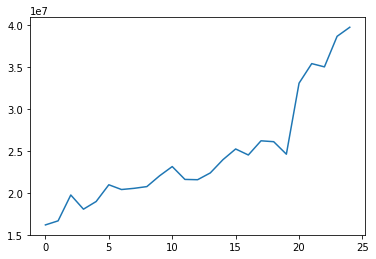

In [94]:
pd_df['sum(quantity)'].plot()

alternative way

In [95]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

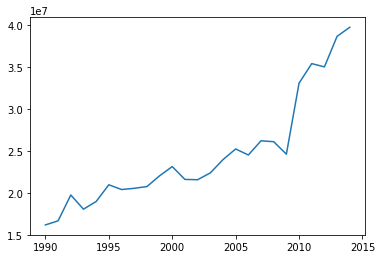

In [96]:
plt.figure()
plt.plot(years, sums)
plt.show()

# Домашнее задание
- Скачайте dataset iris https://drive.google.com/file/d/18ksAxTxBkp15LToEg46BHhwp3sPIoeUU/view?usp=sharing
- Решите домашнее задание - https://colab.research.google.com/drive/1bFOzJNdQzITORtur_m0utqfDJ0QbGe7D?usp=sharing